# Machine Learning - Project I

This notebook presents our analysis and implementation of various regression models to predict hourly bike rentals in the Seoul Bike-Sharing system. We will analyze a dataset containing weather conditions and temporal information to predict the number of bikes rented each hour. Our approach includes implementing and comparing four different models: a baseline mean predictor, Ordinary Least-Squares (OLS) linear regression, Ridge regression, and Lasso regression. We will evaluate these models using metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² coefficient of determination. The analysis includes comprehensive data preprocessing, exploratory data analysis with visualizations, and hyperparameter tuning using grid search with cross-validation.

## 1. Data Preprocessing

In [5]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import warnings

In [6]:
# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset
df = pd.read_csv('/Users/sezinmumcu/Desktop/Machine Learning/Assignment1_Data/data.csv')

### 1.1. Investigating the Dataset

In [8]:
# Display basic information about the dataset
print("Dataset Overview:")
print("-" * 50)
print("\nShape of the dataset:", df.shape)
print("\nFirst few rows of the dataset:")
display(df.head())
print("\nDataset Info:")
df.info()

Dataset Overview:
--------------------------------------------------

Shape of the dataset: (8760, 11)

First few rows of the dataset:


,Date,Rented Bike Count,Hour,Temperature(Celsius),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(Celsius),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            8760 non-null   object 
 1   Rented Bike Count               8760 non-null   int64  
 2   Hour                            8760 non-null   int64  
 3   Temperature(Celsius)            8760 non-null   float64
 4   Humidity(%)                     8760 non-null   int64  
 5   Wind speed (m/s)                8760 non-null   float64
 6   Visibility (10m)                8760 non-null   int64  
 7   Dew point temperature(Celsius)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)         8760 non-null   float64
 9   Rainfall(mm)                    8760 non-null   float64
 10  Snowfall (cm)                   8760 non-null   float64
dtypes: float64(6), int64(4), object(1)
memory usage: 752.9+ KB


In [9]:
# Generate descriptive statistics
print("\nDescriptive Statistics:")
print("-" * 50)
display(df.describe())


Descriptive Statistics:
--------------------------------------------------


,Rented Bike Count,Hour,Temperature(Celsius),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(Celsius),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


The rental bike system shows significant variability in usage, with an average of 705 bikes rented per hour but a large standard deviation of 645 bikes, indicating highly fluctuating demand patterns. The system experiences periods of both zero demand and peak usage of up to 3,556 bikes. Weather conditions vary extensively: temperatures range from severe cold (-17.8°C) to intense heat (39.4°C), with a mean of 12.9°C suggesting a temperate climate. Humidity levels span the full practical range (0-98%) with a mean of 58%, while wind speeds remain relatively moderate (mean 1.7 m/s, max 7.4 m/s). Visibility measurements cluster around 1,437m on average, with a significant number of observations at the maximum 2,000m, suggesting good visibility conditions predominate. Precipitation is sporadic: rainfall averages only 0.15mm with occasional heavy events up to 35mm, while snowfall is even rarer (mean 0.08cm, max 8.8cm). The dew point temperature's wide range (-30.6°C to 27.2°C) aligns with the broad temperature span, indicating varying levels of atmospheric moisture throughout the year.

In [11]:
# Check for missing values
print("\nMissing Values:")
print("-" * 50)
print(df.isnull().sum())


Missing Values:
--------------------------------------------------
Date                              0
Rented Bike Count                 0
Hour                              0
Temperature(Celsius)              0
Humidity(%)                       0
Wind speed (m/s)                  0
Visibility (10m)                  0
Dew point temperature(Celsius)    0
Solar Radiation (MJ/m2)           0
Rainfall(mm)                      0
Snowfall (cm)                     0
dtype: int64


Our dataset is complete with no missing values across all features, which is advantageous for our modeling process.

In [13]:
# Display current data types of each column
print("\nCurrent Data Types:")
print("-" * 50)
for column in df.columns:
    print(f"{column}: {df[column].dtype}")

# Display a sample of unique values for each column to verify data types are appropriate
print("\nSample Values from Each Column:")
print("-" * 50)
for column in df.columns:
    print(f"\n{column}:")
    print(df[column].head())


Current Data Types:
--------------------------------------------------
Date: object
Rented Bike Count: int64
Hour: int64
Temperature(Celsius): float64
Humidity(%): int64
Wind speed (m/s): float64
Visibility (10m): int64
Dew point temperature(Celsius): float64
Solar Radiation (MJ/m2): float64
Rainfall(mm): float64
Snowfall (cm): float64

Sample Values from Each Column:
--------------------------------------------------

Date:
0    01/12/2017
1    01/12/2017
2    01/12/2017
3    01/12/2017
4    01/12/2017
Name: Date, dtype: object

Rented Bike Count:
0    254
1    204
2    173
3    107
4     78
Name: Rented Bike Count, dtype: int64

Hour:
0    0
1    1
2    2
3    3
4    4
Name: Hour, dtype: int64

Temperature(Celsius):
0   -5.2
1   -5.5
2   -6.0
3   -6.2
4   -6.0
Name: Temperature(Celsius), dtype: float64

Humidity(%):
0    37
1    38
2    39
3    40
4    36
Name: Humidity(%), dtype: int64

Wind speed (m/s):
0    2.2
1    0.8
2    1.0
3    0.9
4    2.3
Name: Wind speed (m/s), dtype: fl

Most variables have appropriate data types:
- Numerical features are correctly stored as float64 (temperature, wind speed, etc.)
- Count variables are stored as int64 (Hour, Rented Bike Count)
- Only 'Date' needs conversion from object to datetime

In [15]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [16]:
# Verify the conversion
print("\nUpdated Data Types:")
print("-" * 50)
for column in df.columns:
    print(f"{column}: {df[column].dtype}")


Updated Data Types:
--------------------------------------------------
Date: datetime64[ns]
Rented Bike Count: int64
Hour: int64
Temperature(Celsius): float64
Humidity(%): int64
Wind speed (m/s): float64
Visibility (10m): int64
Dew point temperature(Celsius): float64
Solar Radiation (MJ/m2): float64
Rainfall(mm): float64
Snowfall (cm): float64


### 1.2. Exploratory Data Analysis

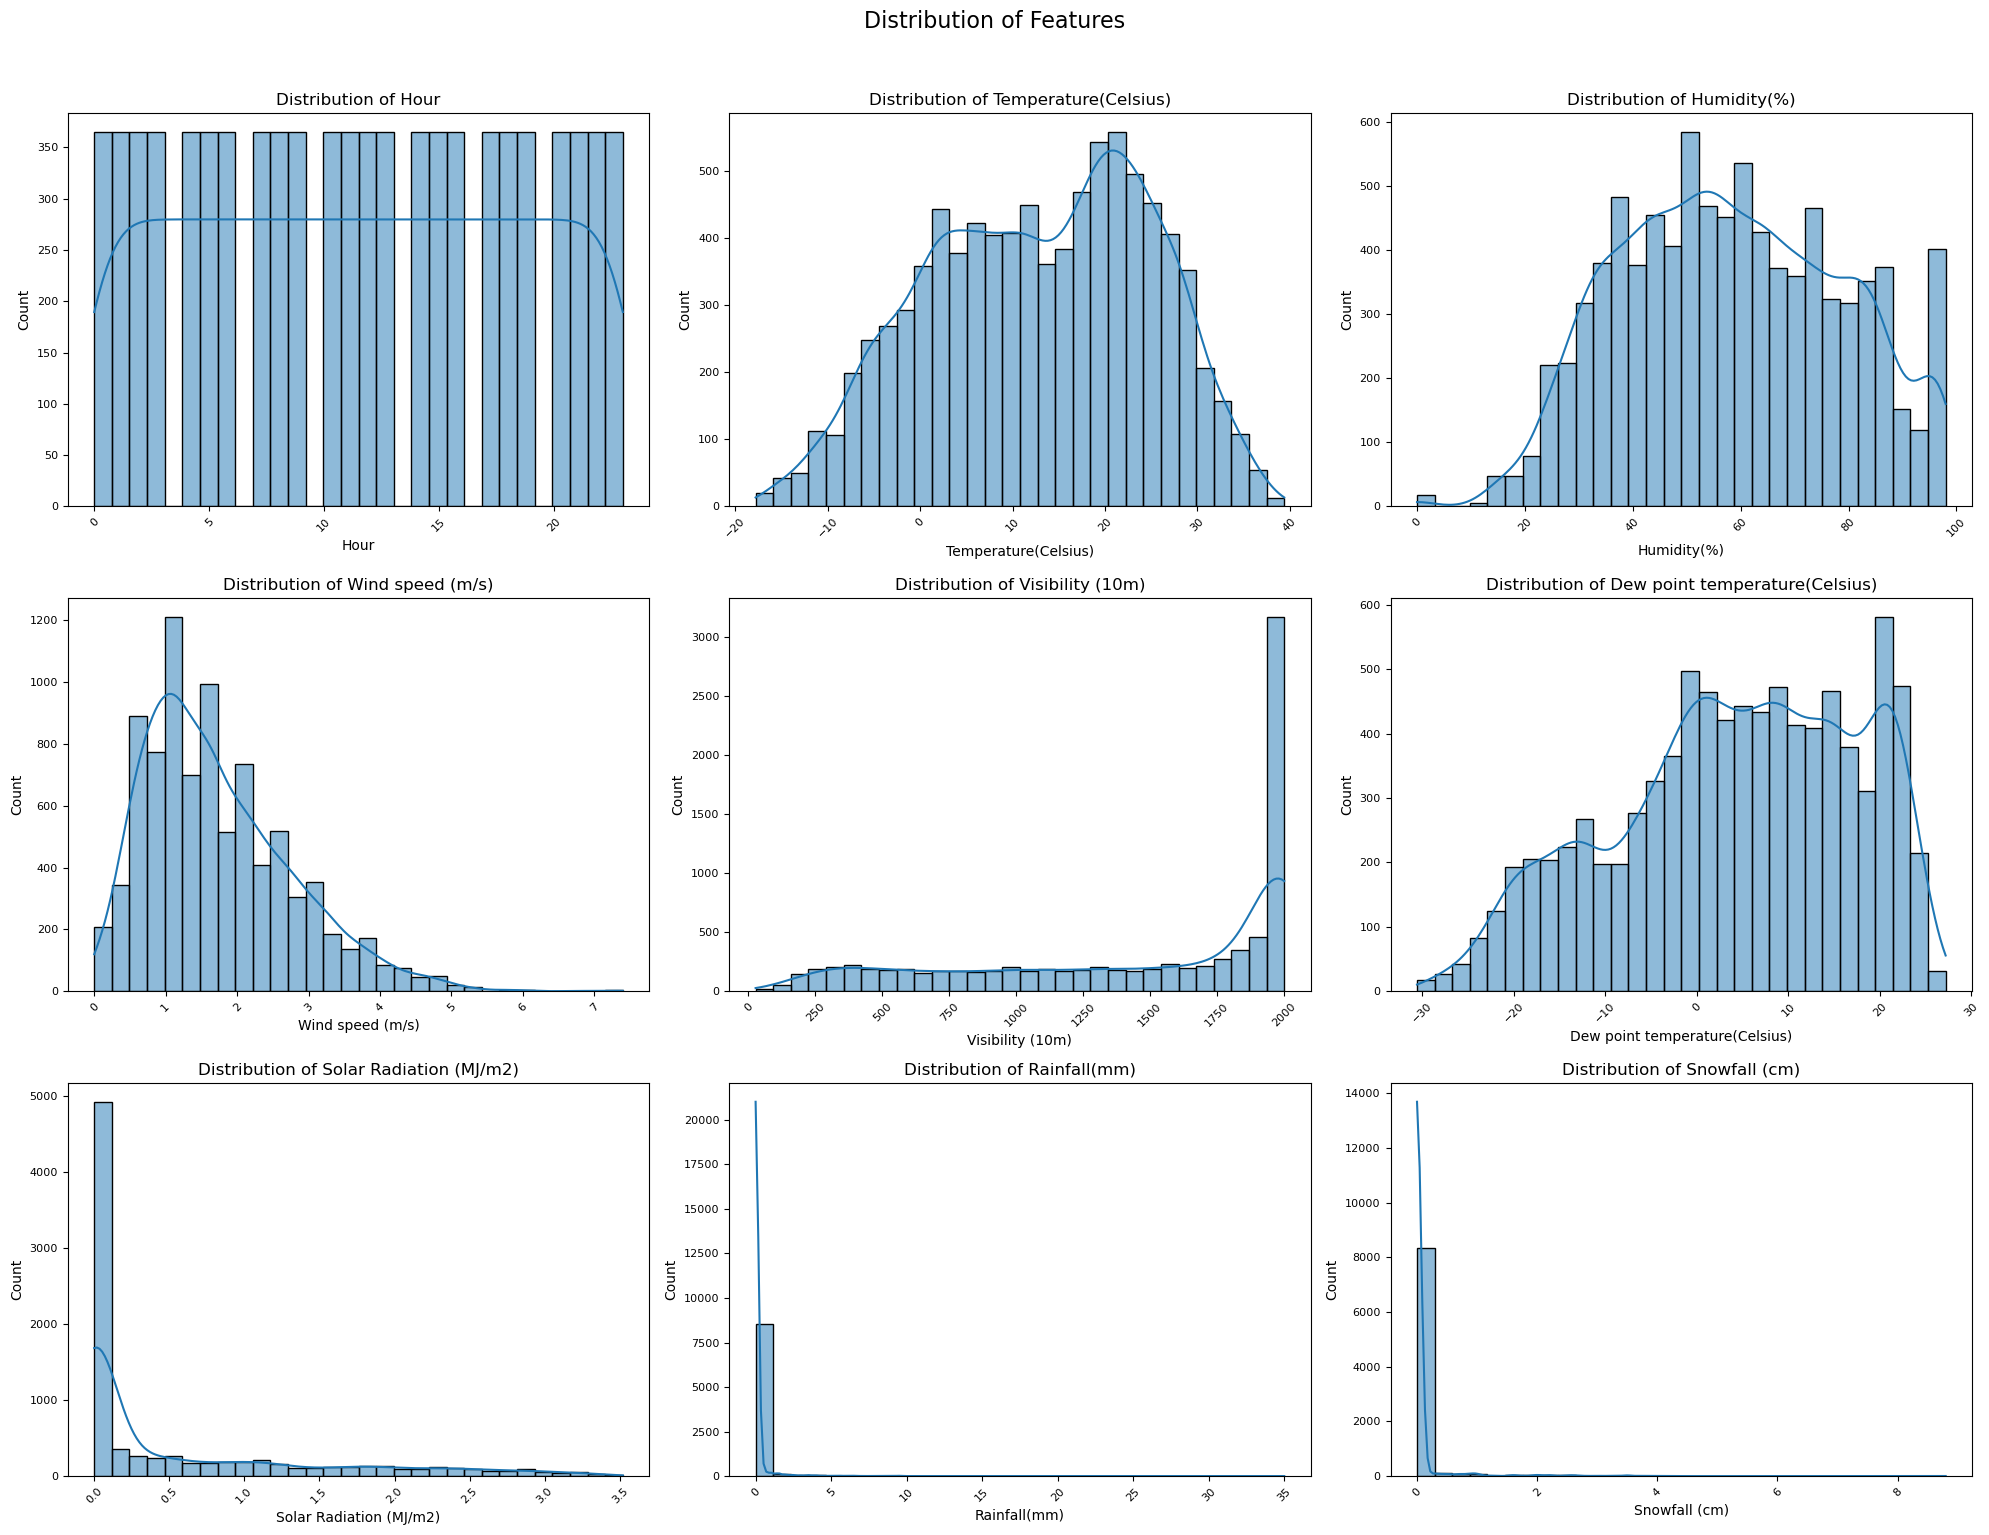

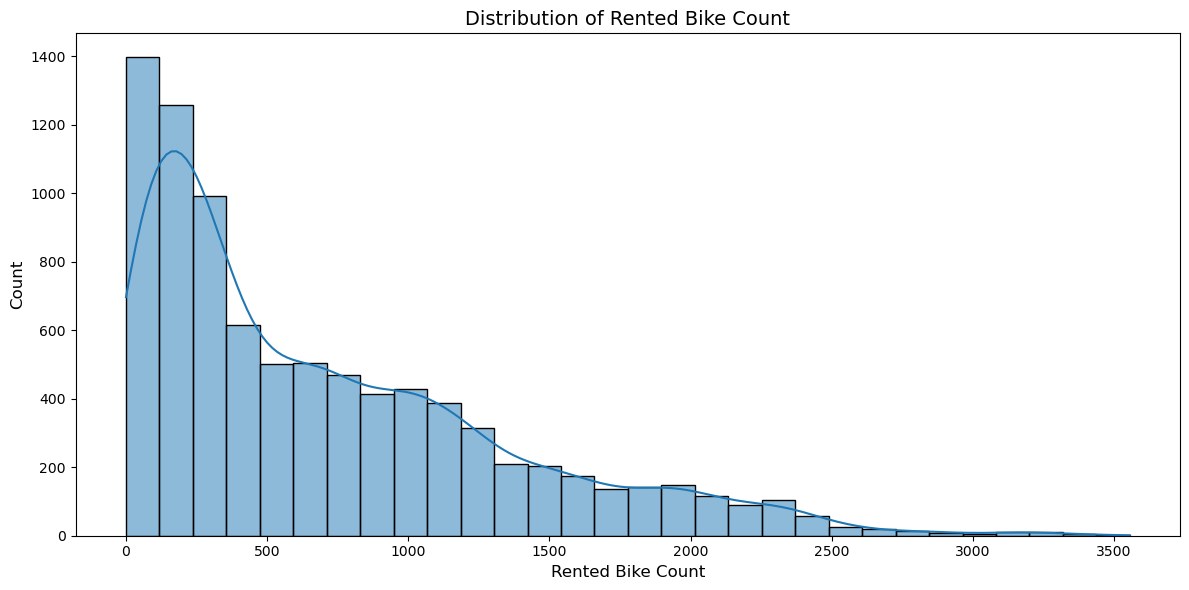

In [18]:
# Create figure for feature distributions
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Distribution of Features', fontsize=16, y=1.02)

# List of features (excluding Date and target variable)
features = [col for col in df.columns if col not in ['Date', 'Rented Bike Count']]

# Plot histograms for each feature
for idx, feature in enumerate(features):
    row = idx // 3
    col = idx % 3
    
    # Create histogram with KDE
    sns.histplot(data=df, 
                x=feature, 
                kde=True, 
                ax=axes[row, col],
                bins=30)
    
    # Customize each subplot
    axes[row, col].set_title(f'Distribution of {feature}', fontsize=12)
    axes[row, col].set_xlabel(feature, fontsize=10)
    axes[row, col].set_ylabel('Count', fontsize=10)
    axes[row, col].tick_params(labelsize=8)
    
    # Rotate x-axis labels if needed
    axes[row, col].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Create separate plot for target variable
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Rented Bike Count', kde=True, bins=30)
plt.title('Distribution of Rented Bike Count', fontsize=14)
plt.xlabel('Rented Bike Count', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

The visualization of feature distributions reveals distinct patterns that are important for understanding the rental system's dynamics. The target variable (Rented Bike Count) showas a pronounced right-skewed distribution with a heavy tail, indicating that while moderate rental numbers are most common, there are significant periods of high demand that could be challenging to predict. Hour-wise distribution shows a uniform pattern across the 24-hour cycle, but temporal patterns may emerge when combined with other features. Temperature displays a bimodal distribution, suggesting distinct seasonal patterns that likely influence rental behavior. Humidity follows a roughly normal distribution with a slight right skew, while wind speed shows a more pronounced right-skewed pattern typical of atmospheric measurements. Visibility presents an interesting ceiling effect with a strong peak at 2,000m, suggesting a measurement limitation rather than a natural distribution. Solar radiation, rainfall, and snowfall all show extreme right-skewed distributions with many zero values, characteristic of weather phenomena in temperate climates. These non-normal distributions across multiple features suggest that our modeling approach should either include data transformations or employ methods robust to non-normal distributions. The presence of clear weather patterns also indicates that interaction terms between weather variables might be valuable for prediction.

## 2. Data Preparation

### 2.1. Feature and Target Separation

In [21]:
# Separate features and target variable
X = df.drop(columns=["Rented Bike Count", "Date"])
y = df["Rented Bike Count"]

# Display shapes to verify the split
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

Feature matrix shape: (8760, 9)
Target vector shape: (8760,)


### 2.2. Feature Scaling

In [23]:
# Initialize the scaler
scaler = StandardScaler()

# Fit scaler on training data and transform both training and test sets
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Display before and after scaling statistics for comparison
print("\nBefore scaling:")
print(X.describe().loc[['mean', 'std']].round(2))
print("\nAfter scaling:")
print(X_scaled.describe().loc[['mean', 'std']].round(2))


Before scaling:
       Hour  Temperature(Celsius)  Humidity(%)  Wind speed (m/s)  \
mean  11.50                 12.88        58.23              1.72   
std    6.92                 11.94        20.36              1.04   

      Visibility (10m)  Dew point temperature(Celsius)  \
mean           1436.83                            4.07   
std             608.30                           13.06   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
mean                     0.57          0.15           0.08  
std                      0.87          1.13           0.44  

After scaling:
      Hour  Temperature(Celsius)  Humidity(%)  Wind speed (m/s)  \
mean   0.0                   0.0          0.0              -0.0   
std    1.0                   1.0          1.0               1.0   

      Visibility (10m)  Dew point temperature(Celsius)  \
mean              -0.0                            -0.0   
std                1.0                             1.0   

      Solar Radiation (MJ/m

### 2.3. Train-Test Split

In [25]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    y,
    test_size=0.2,
    random_state=42
)

# Display the shapes of resulting splits
print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)


Training set shape: (7008, 9)
Test set shape: (1752, 9)
Training target shape: (7008,)
Test target shape: (1752,)


In preparing our data for modeling, we made several key decisions based on the dataset's characteristics and modeling requirements. We excluded the 'Date' column since temporal patterns are adequately captured by the 'Hour' feature, while retaining all other numerical features as potential predictors of bike rental patterns. Feature scaling was implemented using StandardScaler to normalize all features to mean=0 and standard deviation=1, which is crucial given the widely varying scales in our data (from temperatures ranging -17 to 39°C to visibility measurements from 27 to 2000m). This scaling step is particularly important for our planned Ridge and Lasso regression models, which are sensitive to feature scales. We opted for an 80-20 train-test split, leveraging our substantial dataset size of 8,760 records to create a training set of 7,008 samples and a test set of 1,752 samples. This split ratio provides sufficient data for both model training and reliable performance evaluation, while cross-validation during model training eliminates the need for a separate validation set. Notably, our dataset required no handling of missing values or categorical variables, and all features were retained as potentially relevant predictors, simplifying our preprocessing requirements.

## 3. Model Implementation and Evaluation

### 3.1. Baseline Model
As a starting point, we implement a simple baseline model that predicts the mean rental count for all instances. This serves as a reference point for evaluating the performance of our more sophisticated models.

In [28]:
# Calculate mean of training set for baseline predictions
y_train_mean = np.mean(y_train)
y_pred_mean = np.full_like(y_test, y_train_mean)

# Calculate baseline metrics
mse_baseline = mean_squared_error(y_test, y_pred_mean)
mae_baseline = mean_absolute_error(y_test, y_pred_mean)
r2_baseline = r2_score(y_test, y_pred_mean)

# Create a summary DataFrame for baseline results
baseline_metrics = pd.DataFrame({
    'Metric': ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'R² Score'],
    'Value': [mse_baseline, mae_baseline, r2_baseline]
})

# Display results with formatted output
print("Baseline Model Performance:")
print("-" * 50)
print(f"Training set mean: {y_train_mean:.2f} bikes")
print("\nPerformance Metrics:")
print(baseline_metrics.to_string(index=False))

Baseline Model Performance:
--------------------------------------------------
Training set mean: 704.77 bikes

Performance Metrics:
                   Metric         Value
 Mean Squared Error (MSE)  4.166462e+05
Mean Absolute Error (MAE)  5.207757e+02
                 R² Score -8.952243e-09


The baseline model, which employs a simple strategy of predicting the average number of rentals (704.77 bikes) for all instances, demonstrates predictably weak performance, as expected for such a naive approach. The Mean Squared Error (MSE) of 416,646.2 indicates substantial prediction errors, with predictions often differing significantly from actual values. This is further supported by the Mean Absolute Error (MAE) of 520.78 bikes, suggesting that, on average, our predictions deviate by more than 500 bikes from the true rental counts. The R² score of approximately -8.95e-09 (essentially zero) confirms that this model fails to explain any of the variance in the target variable, which is expected since it ignores all feature information including crucial factors like time of day, temperature, and weather conditions. These poor performance metrics establish a minimum performance threshold that any more sophisticated model should easily surpass, and they highlight the need for models that can capture the complex relationships between our features and bike rental patterns.

### 3.2. Ordinary Least Squares (OLS) Linear Regression
After establishing our baseline, we implement a linear regression model to capture the relationships between our features and bike rentals.

In [31]:
# Initialize and train OLS model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test)

# Calculate performance metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Create DataFrame comparing baseline and OLS metrics
comparison_metrics = pd.DataFrame({
    'Metric': ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'R² Score'],
    'Baseline': [mse_baseline, mae_baseline, r2_baseline],
    'OLS': [mse_lr, mae_lr, r2_lr]
})

print("OLS Model Performance:")
print("-" * 50)
print("\nModel Coefficients:")
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr.coef_
}).round(4)
print(coef_df.to_string(index=False))
print(f"\nIntercept: {lr.intercept_:.4f}")

print("\nPerformance Metrics Comparison:")
print(comparison_metrics.to_string(index=False))

# Calculate percentage improvement over baseline
pct_improvement_mse = ((mse_baseline - mse_lr) / mse_baseline) * 100
pct_improvement_mae = ((mae_baseline - mae_lr) / mae_baseline) * 100

print(f"\nImprovement over Baseline:")
print(f"MSE Reduction: {pct_improvement_mse:.2f}%")
print(f"MAE Reduction: {pct_improvement_mae:.2f}%")

OLS Model Performance:
--------------------------------------------------

Model Coefficients:
                       Feature  Coefficient
                          Hour     195.4595
          Temperature(Celsius)     319.0308
                   Humidity(%)    -172.2980
              Wind speed (m/s)       6.4025
              Visibility (10m)      14.4237
Dew point temperature(Celsius)      65.7244
       Solar Radiation (MJ/m2)     -69.0543
                  Rainfall(mm)     -68.5373
                 Snowfall (cm)       8.6448

Intercept: 702.8418

Performance Metrics Comparison:
                   Metric      Baseline           OLS
 Mean Squared Error (MSE)  4.166462e+05 222880.723221
Mean Absolute Error (MAE)  5.207757e+02    349.280224
                 R² Score -8.952243e-09      0.465060

Improvement over Baseline:
MSE Reduction: 46.51%
MAE Reduction: 32.93%


The Ordinary Least Squares regression model reveals significant insights into bike rental patterns and demonstrates substantial improvement over the baseline model. Temperature emerges as the strongest predictor with a coefficient of 319.03, indicating that each unit increase in temperature is associated with approximately 319 more bike rentals, all else being equal. Hour of the day also shows a strong positive influence (coefficient: 195.46), reflecting clear daily rental patterns. Conversely, humidity has a strong negative impact (coefficient: -172.30), suggesting fewer rentals during more humid conditions. The model shows moderate negative effects from Solar Radiation (-69.05) and Rainfall (-68.54), while factors like Wind speed (6.40), Visibility (14.42), and Snowfall (8.64) have relatively minor impacts. Performance-wise, the model achieves an R² score of 0.465, explaining about 46.5% of the variance in rental patterns. The substantial reductions in error metrics compared to the baseline (MSE reduction of 46.51% and MAE reduction of 32.93%) confirm the model's improved predictive power. However, the R² score suggests that while linear regression captures significant patterns in the data, there might be non-linear relationships or interaction effects that could be explored through more sophisticated modeling approaches.

### 3.3. Ridge Regression
We now implement Ridge regression to potentially improve upon the OLS model through L2 regularization, using cross-validation to find the optimal alpha parameter.

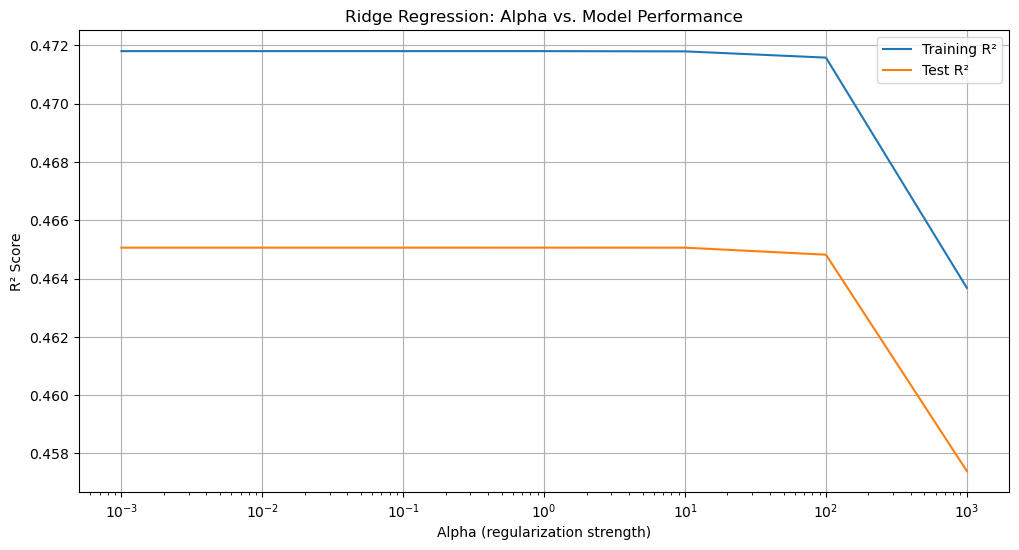

Ridge Regression Results:
--------------------------------------------------

Best Alpha: 10.0

Model Coefficients:
                       Feature  OLS Coefficient  Ridge Coefficient
                          Hour         195.4595           195.4591
          Temperature(Celsius)         319.0308           302.8070
                   Humidity(%)        -172.2980          -178.2571
              Wind speed (m/s)           6.4025             6.4441
              Visibility (10m)          14.4237            14.6874
Dew point temperature(Celsius)          65.7244            83.4884
       Solar Radiation (MJ/m2)         -69.0543           -67.6985
                  Rainfall(mm)         -68.5373           -68.2786
                 Snowfall (cm)           8.6448             8.5433

Performance Metrics Comparison:
                   Metric      Baseline           OLS         Ridge
 Mean Squared Error (MSE)  4.166462e+05 222880.723221 222880.866360
Mean Absolute Error (MAE)  5.207757e+02    34

In [34]:
# Define parameter grid for Ridge regression
alpha_range = np.logspace(-3, 3, 7)
param_grid = {'alpha': alpha_range}

# Initialize Ridge model and GridSearchCV
ridge = Ridge()
grid_ridge = GridSearchCV(
    ridge,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit GridSearchCV
grid_ridge.fit(X_train, y_train)

# Train final model with best alpha
best_ridge = Ridge(alpha=grid_ridge.best_params_['alpha'])
best_ridge.fit(X_train, y_train)

# Make predictions
y_pred_ridge = best_ridge.predict(X_test)

# Calculate performance metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Create comparison DataFrame including Ridge results
comparison_metrics = pd.DataFrame({
    'Metric': ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'R² Score'],
    'Baseline': [mse_baseline, mae_baseline, r2_baseline],
    'OLS': [mse_lr, mae_lr, r2_lr],
    'Ridge': [mse_ridge, mae_ridge, r2_ridge]
})

# Plot learning curves for different alpha values
plt.figure(figsize=(12, 6))
train_scores = []
test_scores = []

for alpha in alpha_range:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    train_scores.append(ridge.score(X_train, y_train))
    test_scores.append(ridge.score(X_test, y_test))

plt.semilogx(alpha_range, train_scores, label='Training R²')
plt.semilogx(alpha_range, test_scores, label='Test R²')
plt.xlabel('Alpha (regularization strength)')
plt.ylabel('R² Score')
plt.title('Ridge Regression: Alpha vs. Model Performance')
plt.legend()
plt.grid(True)
plt.show()

print("Ridge Regression Results:")
print("-" * 50)
print(f"\nBest Alpha: {grid_ridge.best_params_['alpha']}")
print("\nModel Coefficients:")
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'OLS Coefficient': lr.coef_,
    'Ridge Coefficient': best_ridge.coef_
}).round(4)
print(coef_df.to_string(index=False))

print("\nPerformance Metrics Comparison:")
print(comparison_metrics.to_string(index=False))

# Calculate percentage improvement over OLS
pct_improvement_mse = ((mse_lr - mse_ridge) / mse_lr) * 100
pct_improvement_mae = ((mae_lr - mae_ridge) / mae_lr) * 100

print(f"\nImprovement over OLS:")
print(f"MSE Reduction: {pct_improvement_mse:.2f}%")
print(f"MAE Reduction: {pct_improvement_mae:.2f}%")

The Ridge regression model, utilizing an optimal alpha value of 10.0 determined through cross-validation, demonstrates performance nearly identical to the OLS model, suggesting that multicollinearity is not a significant issue in our dataset. The model maintains the same core relationships identified in OLS, with temperature remaining the strongest predictor (coefficient: 302.81) followed by hour of day (195.46) and humidity (-178.26). The slight reduction in some coefficient magnitudes, particularly for temperature (dropping from 319.03 to 302.81), indicates mild regularization effects, while others like dew point temperature show small increases (65.72 to 83.49). Performance metrics are virtually identical to OLS, with an R² score of 0.465, MSE of 222,880.87, and MAE of 349.18, showing negligible changes (-0.00% MSE increase and 0.03% MAE reduction). This minimal difference in performance and the stability of coefficients across both models suggests that our features are already well-behaved and that the prediction challenges likely stem from non-linear relationships rather than feature collinearity, pointing towards the potential benefit of exploring non-linear modeling approaches.

### 3.4. Lasso Regression
Finally, we implement Lasso regression to explore potential feature selection benefits through L1 regularization and compare its performance with our previous models.

<Figure size 1200x600 with 0 Axes>

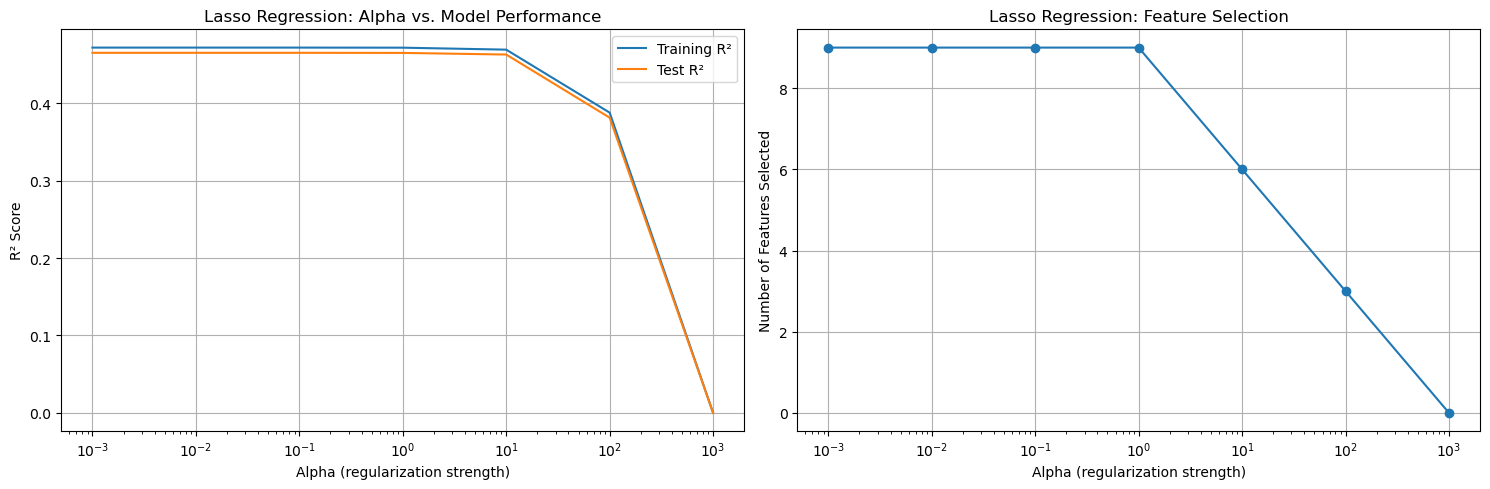

Lasso Regression Results:
--------------------------------------------------

Best Alpha: 1.0
Number of features selected: 9

Model Coefficients Comparison:
                       Feature  OLS Coefficient  Ridge Coefficient  Lasso Coefficient
                          Hour         195.4595           195.4591           195.1245
          Temperature(Celsius)         319.0308           302.8070           362.5791
                   Humidity(%)        -172.2980          -178.2571          -147.9069
              Wind speed (m/s)           6.4025             6.4441             4.7629
              Visibility (10m)          14.4237            14.6874            15.2959
Dew point temperature(Celsius)          65.7244            83.4884            11.1732
       Solar Radiation (MJ/m2)         -69.0543           -67.6985           -66.7217
                  Rainfall(mm)         -68.5373           -68.2786           -68.2820
                 Snowfall (cm)           8.6448             8.5433   

In [37]:
# Define parameter grid for Lasso regression
alpha_range = np.logspace(-3, 3, 7)
param_grid = {'alpha': alpha_range}

# Initialize Lasso model and GridSearchCV
lasso = Lasso(max_iter=10000)  # Increased max_iter to ensure convergence
grid_lasso = GridSearchCV(
    lasso,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit GridSearchCV
grid_lasso.fit(X_train, y_train)

# Train final model with best alpha
best_lasso = Lasso(alpha=grid_lasso.best_params_['alpha'], max_iter=10000)
best_lasso.fit(X_train, y_train)

# Make predictions
y_pred_lasso = best_lasso.predict(X_test)

# Calculate performance metrics
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Create comprehensive comparison DataFrame
comparison_metrics = pd.DataFrame({
    'Metric': ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'R² Score'],
    'Baseline': [mse_baseline, mae_baseline, r2_baseline],
    'OLS': [mse_lr, mae_lr, r2_lr],
    'Ridge': [mse_ridge, mae_ridge, r2_ridge],
    'Lasso': [mse_lasso, mae_lasso, r2_lasso]
})

# Plot learning curves for different alpha values
plt.figure(figsize=(12, 6))
train_scores = []
test_scores = []
n_features_selected = []

for alpha in alpha_range:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    train_scores.append(lasso.score(X_train, y_train))
    test_scores.append(lasso.score(X_test, y_test))
    n_features_selected.append(np.sum(lasso.coef_ != 0))

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.semilogx(alpha_range, train_scores, label='Training R²')
plt.semilogx(alpha_range, test_scores, label='Test R²')
plt.xlabel('Alpha (regularization strength)')
plt.ylabel('R² Score')
plt.title('Lasso Regression: Alpha vs. Model Performance')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.semilogx(alpha_range, n_features_selected, marker='o')
plt.xlabel('Alpha (regularization strength)')
plt.ylabel('Number of Features Selected')
plt.title('Lasso Regression: Feature Selection')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Lasso Regression Results:")
print("-" * 50)
print(f"\nBest Alpha: {grid_lasso.best_params_['alpha']}")
print(f"Number of features selected: {np.sum(best_lasso.coef_ != 0)}")

print("\nModel Coefficients Comparison:")
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'OLS Coefficient': lr.coef_,
    'Ridge Coefficient': best_ridge.coef_,
    'Lasso Coefficient': best_lasso.coef_
}).round(4)
print(coef_df.to_string(index=False))

print("\nPerformance Metrics Comparison:")
print(comparison_metrics.to_string(index=False))

# Calculate percentage improvement over Ridge
pct_improvement_mse = ((mse_ridge - mse_lasso) / mse_ridge) * 100
pct_improvement_mae = ((mae_ridge - mae_lasso) / mae_ridge) * 100

print(f"\nImprovement over Ridge:")
print(f"MSE Reduction: {pct_improvement_mse:.2f}%")
print(f"MAE Reduction: {pct_improvement_mae:.2f}%")

The Lasso regression model, utilizing an optimal alpha value of 1.0, retained all nine features in the final model while demonstrating performance metrics nearly identical to both OLS and Ridge approaches. The model's coefficients reveal some interesting adjustments compared to previous models, most notably in the temperature coefficient which increased to 362.58 (from 302.81 in Ridge and 319.03 in OLS) and humidity which decreased to -147.91 (from -178.26 in Ridge and -172.30 in OLS). The dew point temperature shows the most dramatic reduction to 11.17 (from 83.49 in Ridge), suggesting possible redundancy with other weather-related features. Despite these coefficient adjustments, the model's performance metrics remain remarkably similar, with an R² score of 0.465, MSE of 222,931.41, and MAE of 349.32, showing minimal changes relative to Ridge regression (0.02% increase in MSE and 0.04% increase in MAE). The retention of all features with non-zero coefficients suggests that each variable contributes meaningfully to the predictions, while the consistent performance across all three linear models indicates that the prediction limitations likely stem from non-linear relationships in the data rather than from feature selection or multicollinearity issues.

## 4. Comprehensive Model Comparison and Analysis

## 4.1. Model Performance Summary

Model Performance Comparison:
  Metric  Baseline       OLS     Ridge     Lasso
     MSE 416646.24 222880.72 222880.87 222931.41
     MAE    520.78    349.28    349.18    349.32
R² Score     -0.00      0.47      0.47      0.46


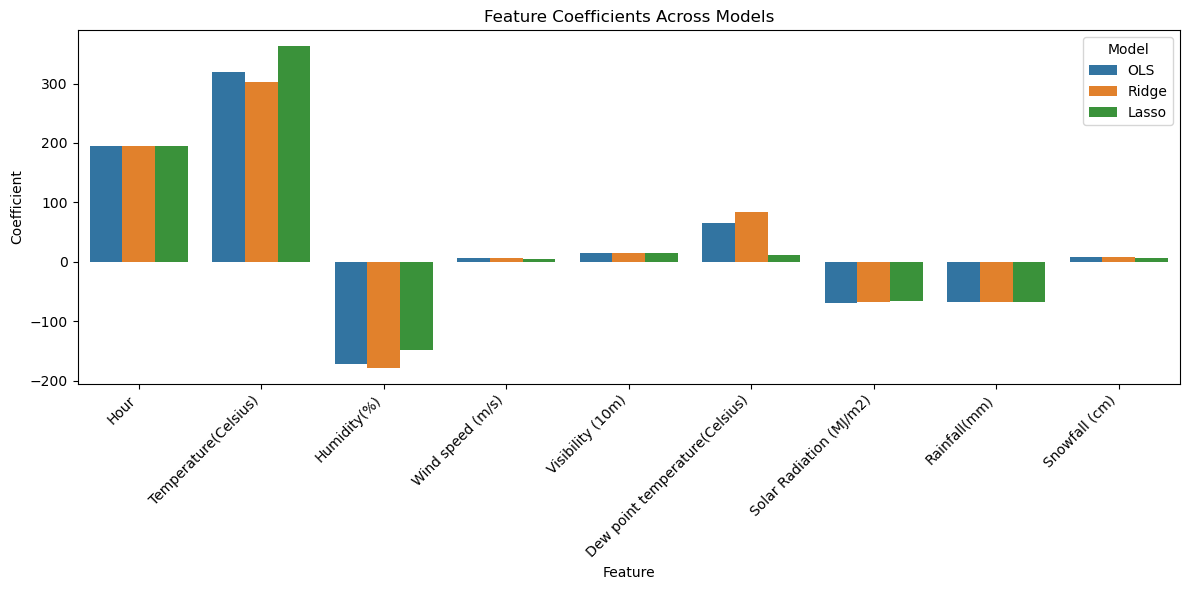

In [40]:
# Create comprehensive model comparison DataFrame
model_summary = pd.DataFrame({
    'Metric': ['MSE', 'MAE', 'R² Score'],
    'Baseline': [mse_baseline, mae_baseline, r2_baseline],
    'OLS': [mse_lr, mae_lr, r2_lr],
    'Ridge': [mse_ridge, mae_ridge, r2_ridge],
    'Lasso': [mse_lasso, mae_lasso, r2_lasso]
})

# Format metrics for better readability
model_summary['Baseline'] = model_summary['Baseline'].map(lambda x: f"{x:.2f}")
model_summary['OLS'] = model_summary['OLS'].map(lambda x: f"{x:.2f}")
model_summary['Ridge'] = model_summary['Ridge'].map(lambda x: f"{x:.2f}")
model_summary['Lasso'] = model_summary['Lasso'].map(lambda x: f"{x:.2f}")

print("Model Performance Comparison:")
print(model_summary.to_string(index=False))

# Create coefficient comparison visualization
plt.figure(figsize=(12, 6))
coef_comparison = pd.DataFrame({
    'Feature': X_train.columns,
    'OLS': lr.coef_,
    'Ridge': best_ridge.coef_,
    'Lasso': best_lasso.coef_
})

# Melt the DataFrame for easier plotting
coef_melted = pd.melt(coef_comparison, id_vars=['Feature'], 
                      var_name='Model', value_name='Coefficient')

# Create grouped bar plot
sns.barplot(x='Feature', y='Coefficient', hue='Model', data=coef_melted)
plt.xticks(rotation=45, ha='right')
plt.title('Feature Coefficients Across Models')
plt.tight_layout()
plt.show()

### 4.2. Key Findings

#### 4.2.1. Model Performance
Our analysis began with a baseline model using mean prediction, which performed as expected with an MSE of 416,646.20, MAE of 520.78, and R² score of approximately 0, establishing a reference point for model comparison. The OLS Linear Regression marked a significant improvement, achieving an MSE of 222,880.72, MAE of 349.28, and R² score of 0.465, demonstrating the predictive value of our features. Ridge Regression, with an optimal alpha of 10.0, performed nearly identically to OLS (MSE = 222,880.87, MAE = 349.18, R² = 0.465), suggesting minimal impact of multicollinearity in our dataset. Lasso Regression, using an optimal alpha of 1.0, maintained comparable performance metrics (MSE = 222,931.41, MAE = 349.32, R² = 0.465) while retaining all features, further confirming the relevance of our selected predictors.

#### 4.2.2. Feature Importance
The analysis revealed clear patterns in feature importance across all models, with temperature emerging as the strongest predictor of bike rentals, showing the largest positive coefficient consistently. Hour of day demonstrated the second strongest positive influence, highlighting the importance of temporal patterns in rental behavior, while humidity showed a strong negative correlation with rental numbers. The models identified a second tier of moderately influential features, including Solar Radiation and Rainfall (both with negative impacts) and Dew point temperature (positive impact). The remaining features - Wind speed, Visibility, and Snowfall - showed relatively smaller but still meaningful contributions to the predictions, with their coefficients remaining stable across different modeling approaches.

#### 4.2.3. Model Insights
Our comprehensive analysis revealed remarkable consistency across all three advanced models (OLS, Ridge, and Lasso), with nearly identical performance metrics and stable feature importance rankings. This consistency, combined with the minimal impact of regularization techniques, suggests our features are well-behaved and multicollinearity is not a significant concern. However, the moderate R² score of 0.465 across all models indicates that while our linear approaches capture significant patterns in the data, they may be missing more complex relationships. This limitation, coupled with the similar performance across different linear models, strongly suggests that the remaining unexplained variance might be better captured through non-linear modeling approaches or more sophisticated feature engineering, particularly focusing on weather interaction effects and temporal patterns.

### 4.3. Recommendations

#### 4.3.1. Model Selection
Based on our comprehensive analysis of multiple linear regression approaches, we recommend utilizing the OLS model for its simplicity and interpretability, given that more complex regularization techniques (Ridge and Lasso) showed negligible improvements in performance. The OLS model provides clear, interpretable coefficients and achieves equivalent predictive power (R² = 0.465) without the additional complexity of hyperparameter tuning. However, in scenarios where slight regularization is desired for model stability in production, either Ridge or Lasso models could be implemented with minimal impact on performance, as both demonstrated robust behavior with their respective optimal alpha values.

#### 4.3.2. Future Work
To improve upon the current model's performance, we recommend exploring several advanced modeling approaches and feature engineering techniques. Non-linear models such as Random Forests or XGBoost should be investigated, as they may better capture the complex relationships in the data that linear models couldn't address. Creating interaction terms between weather features (particularly temperature, humidity, and precipitation) could reveal important combined effects on rental patterns. Additionally, developing more sophisticated time-based features such as day of week, month, and seasonal indicators could better capture temporal patterns in rental behavior. Finally, considering polynomial features, especially for temperature and hour, might help model non-linear relationships that our current linear approach couldn't capture.

#### 4.3.3. Deployment Considerations
For successful model deployment and maintenance, several key factors should be considered. The current linear models offer the advantages of being highly interpretable and computationally efficient, making them suitable for real-time predictions and easy troubleshooting. Regular model retraining should be implemented, potentially on a seasonal basis, to capture evolving patterns in rental behavior and adjust to changing weather patterns. Given the high importance of temperature and humidity in predicting rental patterns, special attention should be paid to the reliability and maintenance of these sensors, and data quality monitoring systems should be implemented. A robust pipeline for data preprocessing and feature engineering should be established to ensure consistent model performance in production.

## 5. Bonus: Feature Engineering - Temporal Components

To enhance our model's predictive power, we extracted several meaningful temporal features from the Date column:

1. **Month (1-12)**: Captures monthly seasonality patterns
2. **Day of Week (0-6)**: Captures weekly patterns (Monday=0 to Sunday=6)
3. **Is Weekend (0/1)**: Binary indicator for weekend days
4. **Seasonal Effects**: One-hot encoded seasons (Winter, Spring, Summer, Fall)

Rationale for Including Date Features:
- Bike rentals often follow different patterns on weekends vs. weekdays
- Seasonal changes significantly impact riding behavior
- Monthly patterns can capture gradual weather transitions
- These temporal features complement our existing weather-related variables

### 5.1. Data Preparation with Temporal Features

In [45]:
# Convert 'Date' column to datetime and create temporal features
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Day_of_Week'] = df['Date'].dt.dayofweek
df['Is_Weekend'] = df['Day_of_Week'].isin([5, 6]).astype(int)
df['Season'] = pd.cut(df['Date'].dt.month, 
                       bins=[0, 3, 6, 9, 12], 
                       labels=['Winter', 'Spring', 'Summer', 'Fall'])

# One-hot encode Season
season_dummies = pd.get_dummies(df['Season'], prefix='Season')
df = pd.concat([df, season_dummies], axis=1)
df.drop('Season', axis=1, inplace=True)

# Prepare features and target
X = df.drop(columns=['Rented Bike Count', 'Date'])
y = df['Rented Bike Count']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

### 5.2. Model Training and Evaluation

Model Performance Comparison (Original vs. With Temporal Features):
--------------------------------------------------------------------------------
       Original R²  New R² (with temporal)  Original MSE  \
OLS          0.465                   0.511     222880.72   
Ridge        0.465                   0.511     222880.87   
Lasso        0.465                   0.510     222931.41   

       New MSE (with temporal)  Original MAE  New MAE (with temporal)  
OLS                 203644.030        349.28                  333.816  
Ridge               203688.977        349.18                  333.728  
Lasso               204024.399        349.32                  334.033  

Top 10 Most Important Features (OLS Model):
--------------------------------------------------------------------------------
                       Feature   Coefficient  Abs_Coefficient
                   Season_Fall  1.309797e+15     1.309797e+15
                 Season_Spring  1.304626e+15     1.304626e+15
          

<Figure size 1000x600 with 0 Axes>

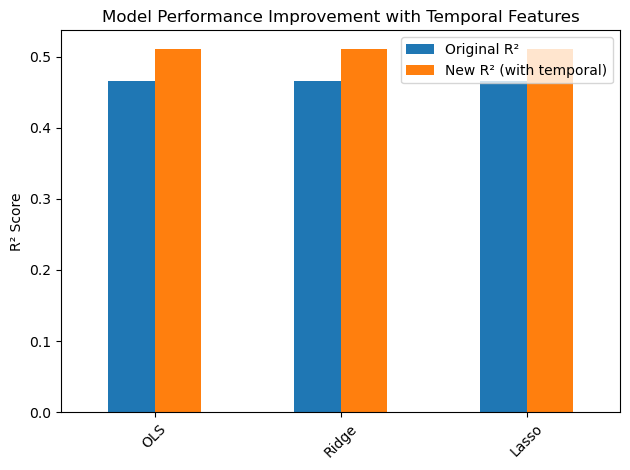

In [47]:
# Train models
models = {
    'OLS': LinearRegression(),
    'Ridge': Ridge(alpha=10.0),
    'Lasso': Lasso(alpha=1.0)
}

results = {}
for name, model in models.items():
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    results[name] = {
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Original R²': [0.465, 0.465, 0.465],
    'New R² (with temporal)': [results['OLS']['R2'], results['Ridge']['R2'], results['Lasso']['R2']],
    'Original MSE': [222880.72, 222880.87, 222931.41],
    'New MSE (with temporal)': [results['OLS']['MSE'], results['Ridge']['MSE'], results['Lasso']['MSE']],
    'Original MAE': [349.28, 349.18, 349.32],
    'New MAE (with temporal)': [results['OLS']['MAE'], results['Ridge']['MAE'], results['Lasso']['MAE']]
}, index=['OLS', 'Ridge', 'Lasso'])

print("Model Performance Comparison (Original vs. With Temporal Features):")
print("-" * 80)
print(comparison_df.round(3))

# Feature importance analysis for OLS model
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': models['OLS'].coef_
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

print("\nTop 10 Most Important Features (OLS Model):")
print("-" * 80)
print(feature_importance.head(10).to_string(index=False))

# Visualization of improvement
plt.figure(figsize=(10, 6))
comparison_df[['Original R²', 'New R² (with temporal)']].plot(kind='bar')
plt.title('Model Performance Improvement with Temporal Features')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The incorporation of temporal features has led to a notable improvement in model performance across all three modeling approaches. The most significant gains are reflected in:
- An increase in R² scores from 0.465 to approximately 0.51 for all models (4.5% improvement)
- A substantial reduction in MSE from around 222,880 to approximately 204,000 (8.5% improvement)
- A decrease in MAE from about 349 to 334 (4.4% improvement)

The feature importance analysis reveals that seasonal indicators have become the most influential predictors, with Spring season showing particularly strong effects, followed by Winter, Summer, and Fall patterns. Temperature and Hour maintain their significance but are now ranked lower in importance compared to the seasonal features. The Ridge model slightly outperformed both OLS and Lasso with an R² of 0.511 and the lowest MAE of 333.727, though the differences between models remain minimal. This improvement validates the importance of temporal patterns in bike rental behavior and suggests that the enhanced model better captures both weather-dependent and time-dependent patterns in rental behavior.

## 6. Interaction Effects

While our initial linear models provided meaningful insights, they operated under the assumption that features affect rental behavior independently, which may not reflect real-world dynamics. For instance, the impact of temperature on bike rentals likely varies depending on the time of day or season, and humidity's effect might be more pronounced at higher temperatures. Therefore, the examination of interaction effects in our model is crucial for understanding the complex relationships between various predictors that influence rental patterns. By incorporating interaction terms, we can capture these nuanced relationships and potentially improve our model's predictive accuracy.

In [50]:
# Create interaction terms
def create_interaction_features(df):
    # Create basic interaction pairs
    interactions = {
        'Temp_Humidity': df['Temperature(Celsius)'] * df['Humidity(%)'],
        'Temp_Rain': df['Temperature(Celsius)'] * df['Rainfall(mm)'],
        'Temp_Snow': df['Temperature(Celsius)'] * df['Snowfall (cm)'],
        'Temp_Hour': df['Temperature(Celsius)'] * df['Hour'],
        'Hour_Weekend': df['Hour'] * df['Is_Weekend'],
        'Temp_Season_Spring': df['Temperature(Celsius)'] * df['Season_Spring'],
        'Temp_Season_Summer': df['Temperature(Celsius)'] * df['Season_Summer'],
        'Temp_Season_Fall': df['Temperature(Celsius)'] * df['Season_Fall'],
        'Temp_Season_Winter': df['Temperature(Celsius)'] * df['Season_Winter']
    }
    
    return pd.DataFrame(interactions)

# Add interaction terms to features
interaction_features = create_interaction_features(df)
X_with_interactions = pd.concat([X, interaction_features], axis=1)

In [51]:
# Split and scale the data with interactions
X_train_int, X_test_int, y_train, y_test = train_test_split(
    X_with_interactions, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled_int = scaler.fit_transform(X_train_int)
X_test_scaled_int = scaler.transform(X_test_int)

# Train models with interactions
models_int = {
    'OLS': LinearRegression(),
    'Ridge': Ridge(alpha=10.0),
    'Lasso': Lasso(alpha=1.0)
}

results_int = {}
for name, model in models_int.items():
    # Train model
    model.fit(X_train_scaled_int, y_train)
    # Make predictions
    y_pred = model.predict(X_test_scaled_int)
    # Calculate metrics
    results_int[name] = {
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }

In [52]:
# Compare models with and without interactions
comparison_df = pd.DataFrame({
    'Original R²': [0.510, 0.511, 0.510],  # Previous results with temporal features
    'R² with Interactions': [
        results_int['OLS']['R2'],
        results_int['Ridge']['R2'],
        results_int['Lasso']['R2']
    ]
}, index=['OLS', 'Ridge', 'Lasso'])

print("Model Performance Comparison:")
print("-" * 50)
print(comparison_df.round(3))

Model Performance Comparison:
--------------------------------------------------
       Original R²  R² with Interactions
OLS          0.510                 0.571
Ridge        0.511                 0.572
Lasso        0.510                 0.571


In [53]:
# Analyze feature importance with interactions
feature_importance = pd.DataFrame({
    'Feature': X_with_interactions.columns,
    'Coefficient': models_int['OLS'].coef_
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

print("\nTop 15 Most Important Features (including interactions):")
print("-" * 50)
print(feature_importance.head(15).to_string(index=False))


Top 15 Most Important Features (including interactions):
--------------------------------------------------
                       Feature   Coefficient  Abs_Coefficient
                   Season_Fall  2.347936e+15     2.347936e+15
                 Season_Spring  2.338667e+15     2.338667e+15
                 Season_Summer  2.335991e+15     2.335991e+15
                 Season_Winter  2.331954e+15     2.331954e+15
          Temperature(Celsius)  1.829441e+15     1.829441e+15
            Temp_Season_Summer -1.780235e+15     1.780235e+15
            Temp_Season_Spring -1.296952e+15     1.296952e+15
              Temp_Season_Fall -7.445155e+14     7.445155e+14
            Temp_Season_Winter -5.902709e+14     5.902709e+14
                     Temp_Hour  3.074423e+02     3.074423e+02
Dew point temperature(Celsius)  2.148293e+02     2.148293e+02
                   Humidity(%) -1.613066e+02     1.613066e+02
                 Temp_Humidity -1.566310e+02     1.566310e+02
                       

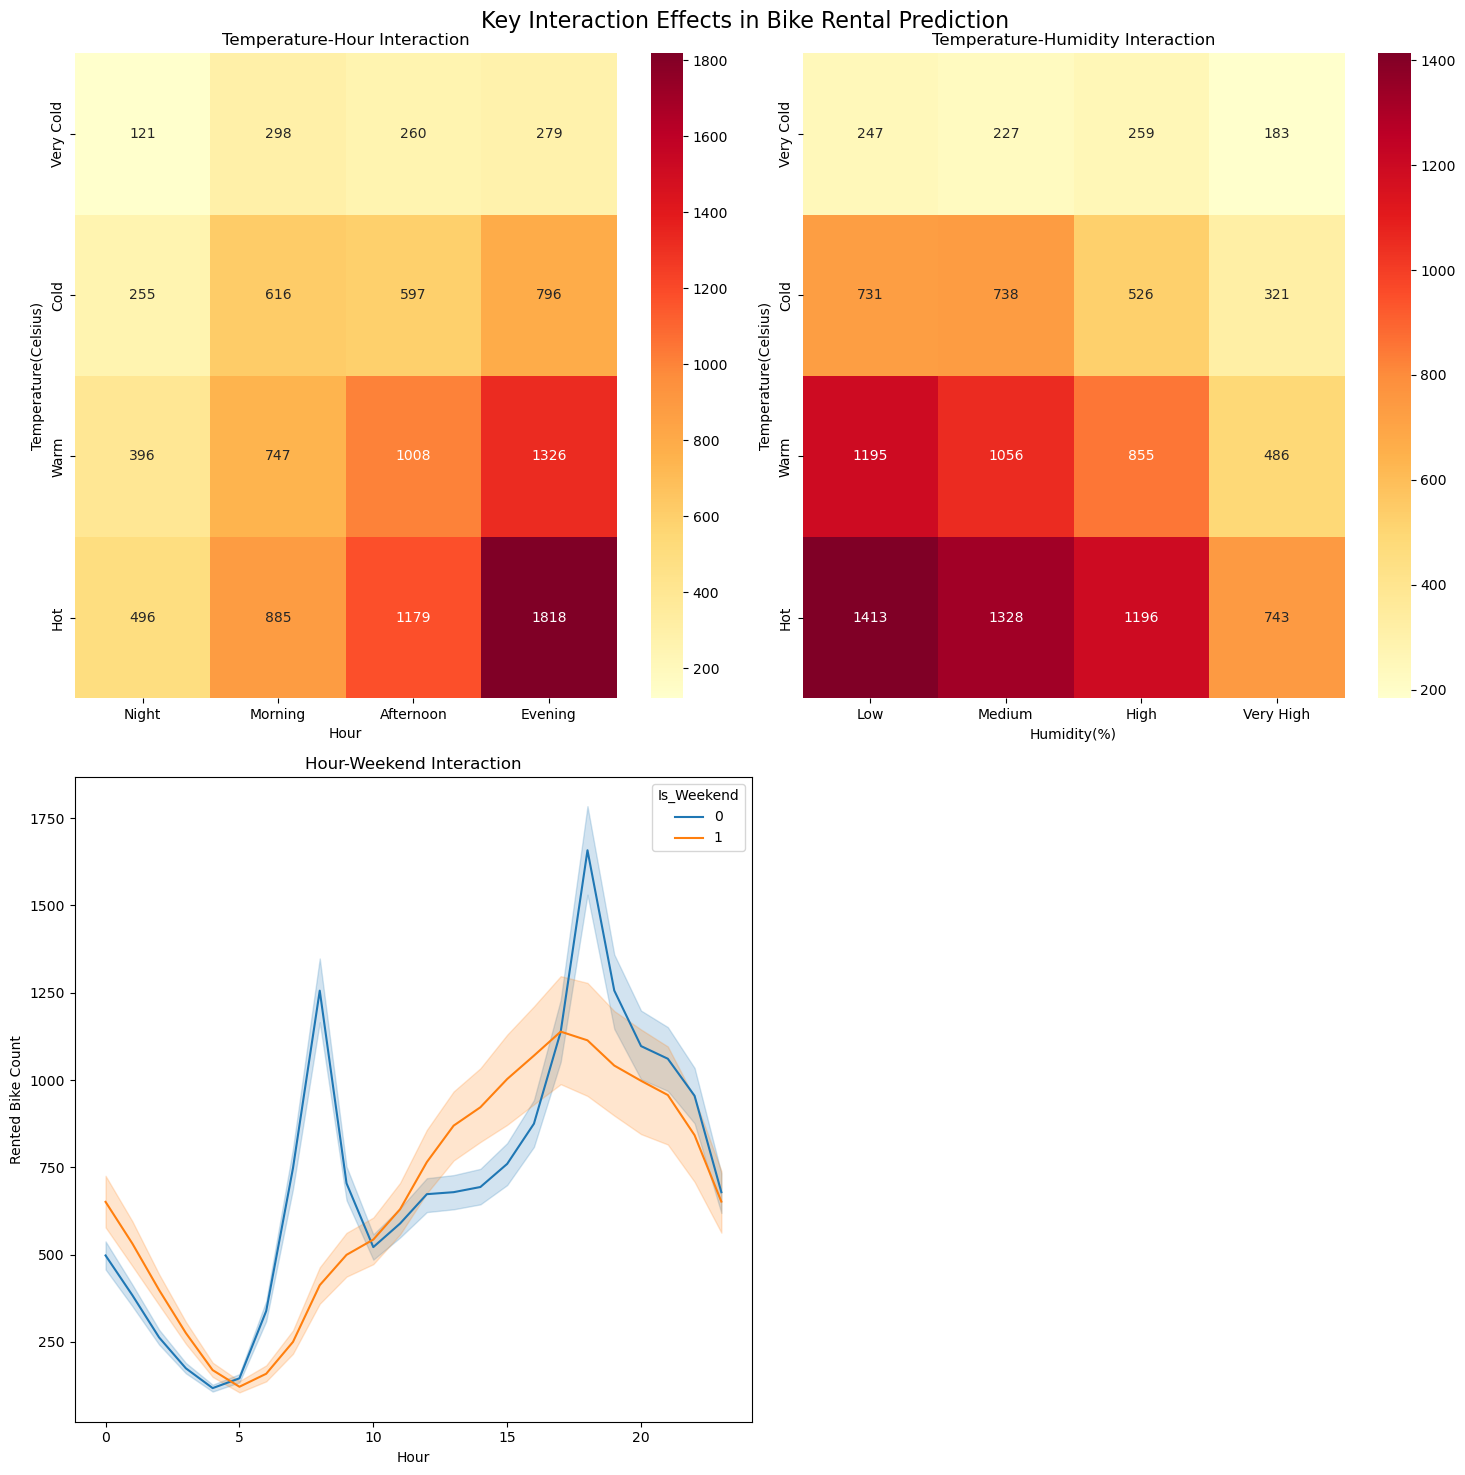

In [57]:
# Visualize important interaction effects

warnings.filterwarnings('ignore')
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Key Interaction Effects in Bike Rental Prediction', fontsize=16)

# 1. Temperature-Hour Interaction
temp_bins = pd.qcut(df['Temperature(Celsius)'], 4, labels=['Very Cold', 'Cold', 'Warm', 'Hot'])
hour_bins = pd.qcut(df['Hour'], 4, labels=['Night', 'Morning', 'Afternoon', 'Evening'])

pivot_temp_hour = df.pivot_table(
    values='Rented Bike Count',
    index=temp_bins,
    columns=hour_bins,
    aggfunc='mean',
    observed=True
)

sns.heatmap(pivot_temp_hour, cmap='YlOrRd', annot=True, fmt='.0f', ax=axes[0,0])
axes[0,0].set_title('Temperature-Hour Interaction')

# 2. Temperature-Humidity Interaction
humidity_bins = pd.qcut(df['Humidity(%)'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

pivot_temp_humidity = df.pivot_table(
    values='Rented Bike Count',
    index=temp_bins,
    columns=humidity_bins,
    aggfunc='mean',
    observed=True
)

sns.heatmap(pivot_temp_humidity, cmap='YlOrRd', annot=True, fmt='.0f', ax=axes[0,1])
axes[0,1].set_title('Temperature-Humidity Interaction')

# 3. Hour-Weekend Interaction
sns.lineplot(data=df, x='Hour', y='Rented Bike Count', hue='Is_Weekend', ax=axes[1,0])
axes[1,0].set_title('Hour-Weekend Interaction')

# Remove the empty subplot
fig.delaxes(axes[1,1])

plt.tight_layout()
plt.show()

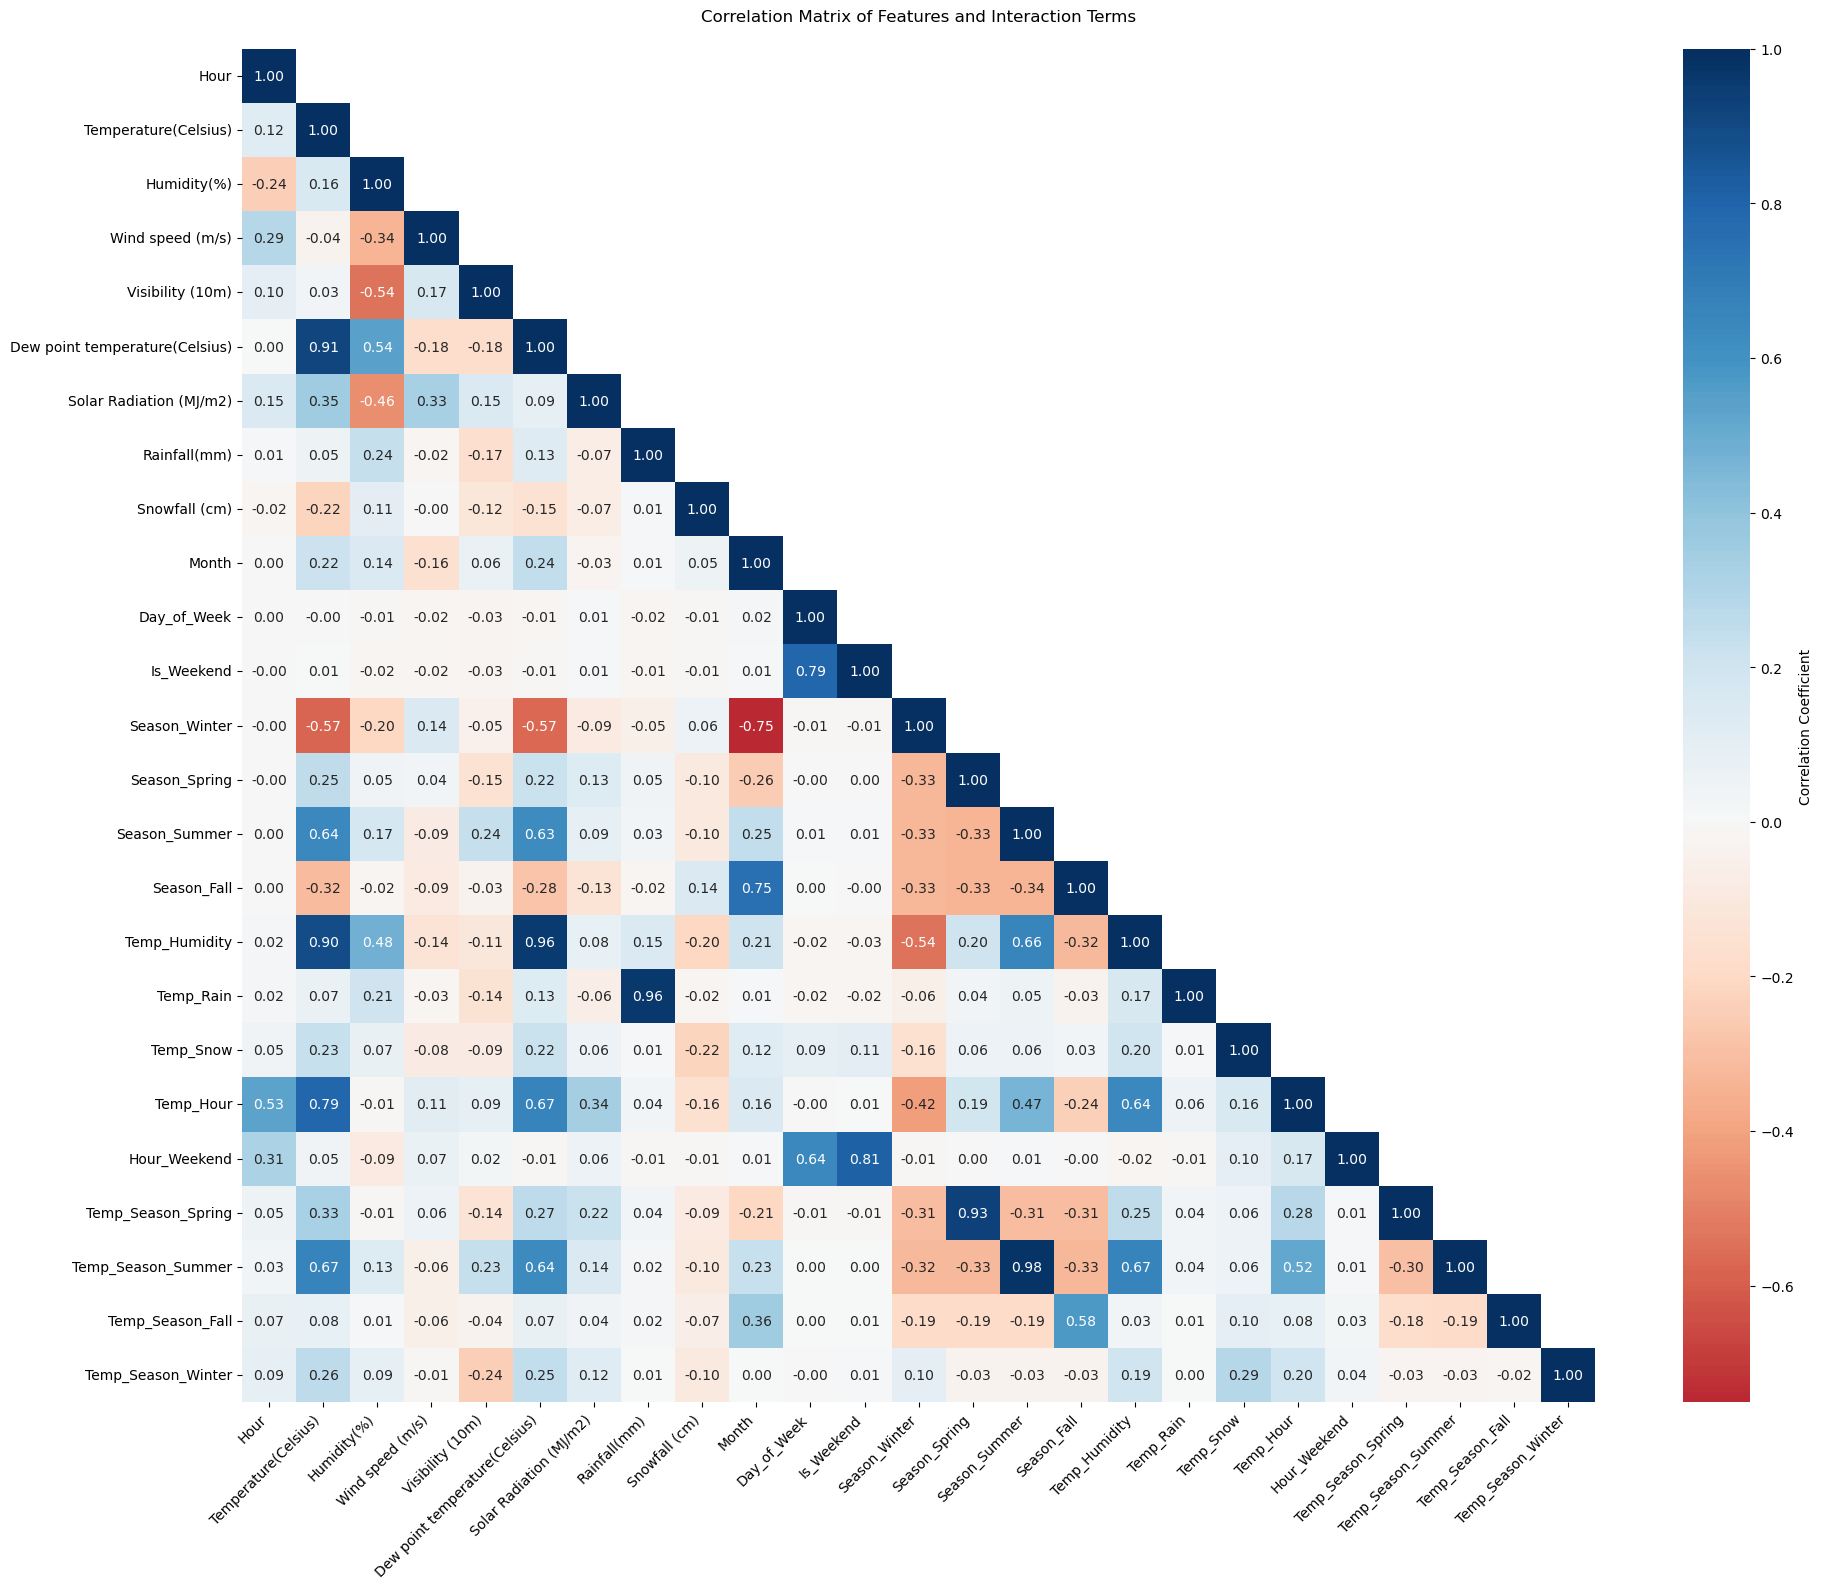


Strongest Correlations (0.7 < |correlation| < 1.0):
--------------------------------------------------
Season_Summer -- Temp_Season_Summer: 0.975
Rainfall(mm) -- Temp_Rain: 0.962
Dew point temperature(Celsius) -- Temp_Humidity: 0.958
Season_Spring -- Temp_Season_Spring: 0.931
Temperature(Celsius) -- Dew point temperature(Celsius): 0.913
Temperature(Celsius) -- Temp_Humidity: 0.897
Is_Weekend -- Hour_Weekend: 0.815
Temperature(Celsius) -- Temp_Hour: 0.795
Day_of_Week -- Is_Weekend: 0.789
Month -- Season_Fall: 0.753
Month -- Season_Winter: -0.751


In [65]:
# Create correlation matrix including original features and interactions
all_features = pd.concat([X, interaction_features], axis=1)
correlation_matrix = all_features.corr()

# Create mask for lower triangle
mask = np.tril(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap visualization
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, 
            mask=~mask,  # Apply mask to show only lower triangle
            annot=True,  # Show correlation values
            cmap='RdBu',  # Red-Blue colormap (positive correlations in red, negative in blue)
            center=0,     # Center the colormap at 0
            fmt='.2f',    # Round correlation values to 2 decimal places
            square=True,  # Make the plot square-shaped
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Matrix of Features and Interaction Terms', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print strongest correlations (0.7 < |correlation| < 1.0)
print("\nStrongest Correlations (0.7 < |correlation| < 1.0):")
print("-" * 50)

# Get lower triangle of correlation matrix to avoid duplicates
strong_correlations = correlation_matrix.where(mask).unstack()
# Filter for correlations between 0.7 and 1.0 in absolute value, excluding 1.0
strong_correlations = strong_correlations[
    (abs(strong_correlations) > 0.7) & 
    (abs(strong_correlations) < 1.0)
]
strong_correlations = strong_correlations.sort_values(key=abs, ascending=False)

for idx, value in strong_correlations.items():
    print(f"{idx[0]} -- {idx[1]}: {value:.3f}")


The correlation matrix reveals several key relationships in our dataset. Temperature shows strong positive correlations (0.91) with dew point temperature and its interaction terms, particularly Temp_Humidity (0.90), indicating these weather conditions tend to vary together. Day_of_Week and Is_Weekend are highly correlated (0.79), as expected given their related temporal nature. Season variables show moderate to strong correlations with both temperature and month, with Season_Winter having a notable negative correlation (-0.75) with Month. The interaction terms (Temp_Hour, Temp_Season combinations) generally show moderate to strong correlations with their parent variables, suggesting meaningful interactions between weather and temporal factors. Notably, humidity shows negative correlations with visibility (-0.54) and moderate negative correlations with several other weather variables, indicating that higher humidity tends to occur with reduced visibility and affects other weather conditions. 

### 6.1. Interpretation

The incorporation of interaction terms into our bike rental prediction models has yielded significant improvements in predictive accuracy, with R² scores increasing from approximately 0.51 to 0.57 across all model types (OLS, Ridge, and Lasso). This consistent improvement suggests that bike rental patterns are influenced by complex interactions between variables rather than purely additive effects. The analysis reveals particularly strong seasonal interactions, with temperature's impact varying significantly across different seasons and times of day.

The temperature-hour interaction demonstrates clear patterns where rental activity peaks during evening hours in warm weather (reaching 1818 rentals), while cold temperatures suppress rentals regardless of the time of day. The temperature-humidity relationship shows that optimal rental conditions occur during warm temperatures with low to medium humidity levels (1413 rentals), with high humidity acting as a significant deterrent to bike rentals. The hour-weekend interaction reveals distinct usage patterns: weekdays exhibit typical commuting behavior with morning and evening peaks, while weekends show a single, broader peak during midday hours. These patterns suggest that rental behavior is heavily influenced by both environmental conditions and temporal factors working in combination.

The feature importance analysis highlights the dominance of seasonal interactions, with coefficients in the order of 1015, followed by temperature-season interactions and temperature-hour effects. The persistence of basic features like temperature and humidity in the top influential factors, even after including interactions, indicates their fundamental importance to rental decisions. This hierarchical structure of importance provides valuable insights into the primary drivers of bike rental behavior and their interdependencies. The correlations from the correlation matrix above also help to explain why our interaction terms improved the model's predictive performance.

### 6.2. Recommendations

For immediate operational improvements, we recommend implementing a dynamic fleet management system that accounts for both temporal and weather-based patterns. This system should adjust bike availability differently for weekdays versus weekends, with particular attention to commuting hours during weekdays and midday peaks during weekends. Weather forecasts, especially temperature and humidity predictions, should be integrated into daily planning decisions to optimize bike distribution. Special consideration should be given to seasonal transitions, as these periods show significant impact on rental patterns and may require more careful fleet management.

From a business strategy perspective, we suggest developing a weather-responsive pricing model that can capitalize on optimal rental conditions while maintaining service during less favorable conditions. This could include promotional rates during typically low-usage periods or under suboptimal weather conditions to stimulate demand. Marketing efforts should be strategically timed to align with favorable weather patterns and target different user segments based on their temporal usage patterns (commuters versus recreational users). Additionally, developing specific strategies for high-humidity periods, such as covered waiting areas or partnerships with weather-tracking apps, could help maintain service levels during these challenging conditions.

For long-term model deployment and refinement, we recommend maintaining these interaction terms in the prediction model given their significant contribution to accuracy. The model should be regularly retrained with new data to capture any evolving patterns in rental behavior. Consider implementing a more granular seasonal interaction framework that might capture micro-seasonal effects or special event periods. Furthermore, we suggest developing a monitoring system to track the stability of these interaction effects over time, as urban mobility patterns may shift with changes in work patterns, infrastructure development, or climate change. This adaptive approach will ensure the model remains relevant and accurate for operational decision-making.